<a href="https://colab.research.google.com/github/BeushevArtem/project/blob/main/16May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ani = pd.read_csv('anime.csv')
ani.head()

,Title,Production,Episodes,Source,Genre,Airdate,Rating,Voters,Theme
0,Shingeki no Kyojin,Wit Studio,25,Manga,"Action,Drama,Fantasy,Mystery","Apr 7, 2013, 01:58 (JST)",8.52,"3,142,121","Military,Super Power"
1,Fullmetal Alchemist: Brotherhood,Bones,64,Manga,"Action,Adventure,Comedy,Drama,Fantasy","Apr 5, 2009, 17:00 (JST)",9.16,"2,676,911",Military
2,Sword Art Online,A-1 Pictures,25,Light novel,"Action,Adventure,Fantasy,Romance","Jul 8, 2012, 00:00 (JST)",7.20,"2,586,628",Game
3,One Punch Man,Madhouse,12,Web manga,"Action,Comedy,Sci-Fi,Supernatural","Oct 5, 2015, 01:05 (JST)",8.52,"2,583,068","Parody,Super Power"
4,Boku no Hero Academia,Bones,13,Manga,"Action,Comedy","Apr 3, 2016, 17:00 (JST)",7.98,"2,426,309","School,Super Power"


In [5]:
ani.dtypes

Title          object
Production     object
Episodes       object
Source         object
Genre          object
Airdate        object
Rating        float64
Voters         object
Theme          object
dtype: object

In [6]:
ani = ani.rename(columns=lambda cols: cols.lower())
ani = ani.rename(columns=lambda cols: cols.replace(" ", "_"))
ani.head()

,title,production,episodes,source,genre,airdate,rating,voters,theme
0,Shingeki no Kyojin,Wit Studio,25,Manga,"Action,Drama,Fantasy,Mystery","Apr 7, 2013, 01:58 (JST)",8.52,"3,142,121","Military,Super Power"
1,Fullmetal Alchemist: Brotherhood,Bones,64,Manga,"Action,Adventure,Comedy,Drama,Fantasy","Apr 5, 2009, 17:00 (JST)",9.16,"2,676,911",Military
2,Sword Art Online,A-1 Pictures,25,Light novel,"Action,Adventure,Fantasy,Romance","Jul 8, 2012, 00:00 (JST)",7.20,"2,586,628",Game
3,One Punch Man,Madhouse,12,Web manga,"Action,Comedy,Sci-Fi,Supernatural","Oct 5, 2015, 01:05 (JST)",8.52,"2,583,068","Parody,Super Power"
4,Boku no Hero Academia,Bones,13,Manga,"Action,Comedy","Apr 3, 2016, 17:00 (JST)",7.98,"2,426,309","School,Super Power"


In [7]:
ani.describe()

,rating
count,1944.000000
mean,7.150849
std,0.709454
min,2.960000
25%,6.720000
50%,7.210000
75%,7.590000
max,9.160000


In [8]:
ani = ani.replace({'episodes': '?'}, np.NaN)
ani['episodes'] = ani['episodes'].astype('float64')

peta = ani.columns.get_loc('voters')
for i in range(ani.shape[0]):
  ani.iloc[i, peta] = ani.iloc[i,peta].replace(',', '')
ani['voters'] = ani['voters'].astype('int32')

ani.describe()
#изначально только рейтинг имеет чиловое значение

,episodes,rating,voters
count,1939.000000,1944.000000,1.992000e+03
mean,14.975245,7.150849,1.643311e+05
std,28.116711,0.709454,3.135926e+05
min,1.000000,2.960000,8.662000e+03
25%,1.000000,6.720000,2.126500e+04
50%,12.000000,7.210000,5.478550e+04
75%,13.000000,7.590000,1.585070e+05
max,500.000000,9.160000,3.142121e+06


In [9]:
for i in range(ani.shape[1]):
  if ani.iloc[:,i].dtype == 'object':
    print(ani.iloc[:,i].value_counts(),'\n')

Shingeki no Kyojin                                      1
Ginga Eiyuu Densetsu: Arata Naru Tatakai no Overture    1
Mobile Suit Gundam AGE                                  1
Atom: The Beginning                                     1
Hellsing: Psalm of the Darkness                         1
                                                       ..
Mai-HiME                                                1
Kengan Ashura                                           1
Katsute Kami Datta Kemono-tachi e                       1
Fate/kaleid liner Prisma☆Illya 3rei!!                   1
Burn Up Scramble                                        1
Name: title, Length: 1992, dtype: int64 

Toei Animation         130
Sunrise                125
Madhouse                83
A-1 Pictures            78
Bones                   73
                      ... 
Nakamura Production      1
Anima&Co.                1
G&G Entertainment        1
Fifth Avenue             1
Vega Entertainment       1
Name: production, Lengt

In [10]:
for i in range(ani.shape[1]):
  print(ani.iloc[:,i].isna().value_counts())
  print('\n')

False    1992
Name: title, dtype: int64


False    1992
Name: production, dtype: int64


False    1939
True       53
Name: episodes, dtype: int64


False    1992
Name: source, dtype: int64


False    1992
Name: genre, dtype: int64


False    1020
True      972
Name: airdate, dtype: int64


False    1944
True       48
Name: rating, dtype: int64


False    1992
Name: voters, dtype: int64


False    1992
Name: theme, dtype: int64




/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


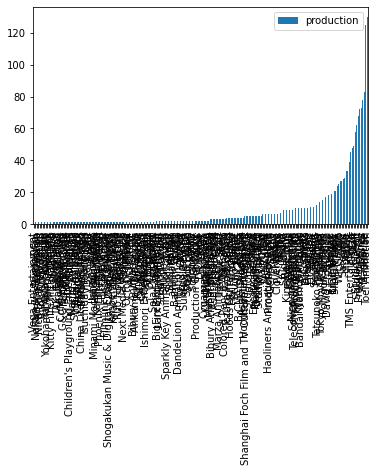

In [11]:
proda = ani['production'].value_counts(ascending = True).to_frame()#[-1:]
proda.plot.bar()

In [ ]:
print('Больше всего выпущено аниме (студия, количество)')
proda[-1:]

Больше всего выпущено аниме (студия, количество)


,production
Toei Animation,130


In [ ]:
episoda = ani['episodes'].value_counts(ascending = True).to_frame()
episoda

,episodes
145.0,1
45.0,1
60.0,1
203.0,1
62.0,1
...,...
26.0,95
24.0,97
13.0,158
12.0,385


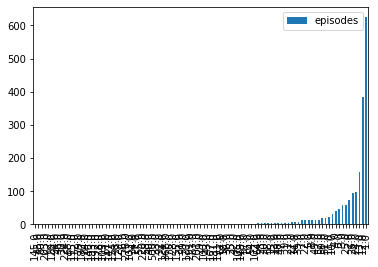

In [ ]:
episoda.plot.bar()

In [ ]:
soua = ani['source'].value_counts(ascending = True).to_frame()
soua[-3:]

,source
Light novel,263
Original,468
Manga,818


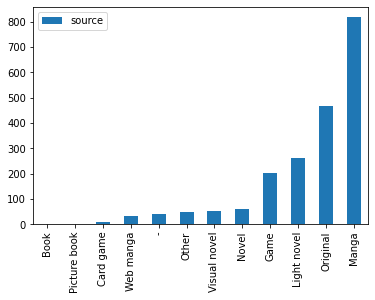

In [ ]:
soura.plot.bar()

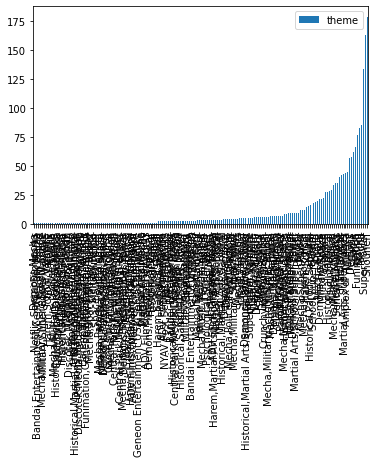

In [ ]:
thema = ani['theme'].value_counts(ascending = True).to_frame()
thema.plot.bar()

In [ ]:
thema[-1:]

,theme
Shounen,179


In [21]:
new_ani = ani['theme'].str.split(',',expand=True)

'''themaPro = pd.DataFrame([],columns = ['theme'])
for i in range(ani.shape[0]):
  themaPro.append(pd.Series(new_ani[0][i], name = 'theme'))
themaPro.head()
'''
new_ani = (new_ani, 'cross')
#dop = ani.groupby('theme')
new_ani.value_counts()

0      1         2      3       4    
Mecha  Military  Music  School  Space    1
dtype: int64

In [ ]:
ani.groupby('production')['rating'].mean().sort_values()

production
Visual Flight            2.960
Gambit                   3.700
l-a-unch・BOX             3.810
Zero-G Room              5.310
Blade                    5.410
                         ...  
Bandai Namco Pictures    8.335
B.CMAY PICTURES          8.400
Bibury Animation CG        NaN
HORNETS                    NaN
OZ                         NaN
Name: rating, Length: 224, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


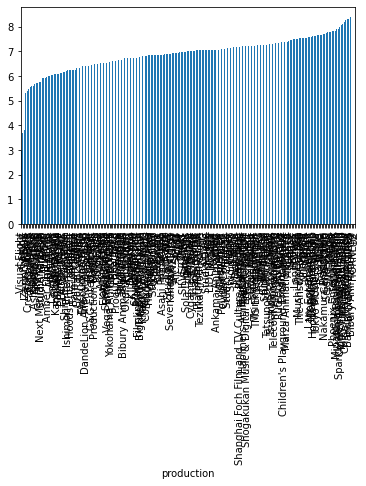

In [ ]:
ani.groupby('production')['rating'].mean().sort_values().plot.bar()

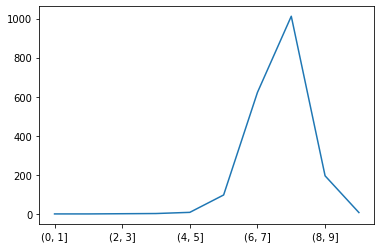

In [ ]:
cut_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
pd.cut(ani['rating'], bins=cut_bins).value_counts(sort=False).plot.line()

In [ ]:
ani[ani['rating'] > 7]['genre'].value_counts()

Action,Sci-Fi                                          78
Action,Drama,Sci-Fi                                    65
Action,Adventure,Comedy,Fantasy                        56
Action                                                 49
Action,Comedy                                          48
                                                       ..
Action,Adventure,Comedy,Fantasy,Sci-Fi,Supernatural     1
Action,Comedy,Fantasy,Romance,Ecchi                     1
Action,Comedy,Drama,Fantasy,Supernatural                1
Action,Girls Love,Horror,Sci-Fi,Supernatural            1
Action,Adventure,Fantasy,Ecchi                          1
Name: genre, Length: 196, dtype: int64

In [ ]:
ani[ani['rating'] > 7]['theme'].value_counts()

Shounen                        121
Super Power                    120
Seinen                          51
-                               49
School                          44
                              ... 
AnimEigo                         1
Historical,Parody                1
Historical,Military,Samurai      1
Mecha,School,Space               1
Demons,Mecha                     1
Name: theme, Length: 126, dtype: int64

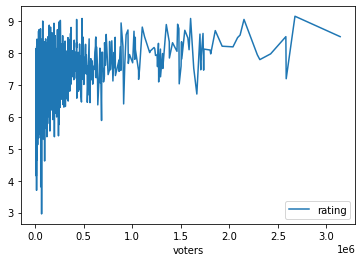

In [ ]:
ani.plot(x='voters', y = 'rating', kind='line')